## Exploratory Data Analysis of Global Netflix Titles: Trends, Genres, and Regional Insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in DataFrame

#### Loading Dataset

In [7]:
# dataset = https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download
df0 = pd.read_csv('netflix_titles.csv')
df0.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data Cleaning

In [14]:
# Missing values
df0.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [10]:
df0['country'] = df0['country'].fillna("Unknown")
df0['director'] = df0['director'].fillna("Unknown")
df0['cast'] = df0['cast'].fillna("Unknown")

In [ ]:
# Convert date_added to datetime
## Remove leading/trailing spaces
df0['date_added'] = df0['date_added'].str.strip()

## Convert to datetime safely
df0['date_added'] = pd.to_datetime(df0['date_added'], errors='coerce')


In [15]:
# Drop Lingering Missing Values
df0.dropna(subset=['date_added'], inplace=True)
df0.dropna(subset=['rating'], inplace=True)
df0.dropna(subset=['duration'], inplace=True)

#### Univariate Analysis

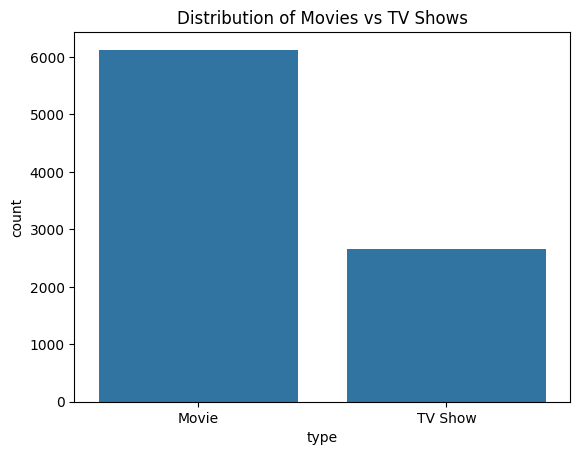

<Figure size 640x480 with 0 Axes>

In [29]:
# Movies vs TV Shows distribution
sns.countplot(data=df0, x="type")
plt.title("Distribution of Movies vs TV Shows")
plt.show()
plt.savefig("../images/movies_vs_tvshows.png")

In [24]:
df0["type"].value_counts(normalize=True)*100

type
Movie      69.692833
TV Show    30.307167
Name: proportion, dtype: float64

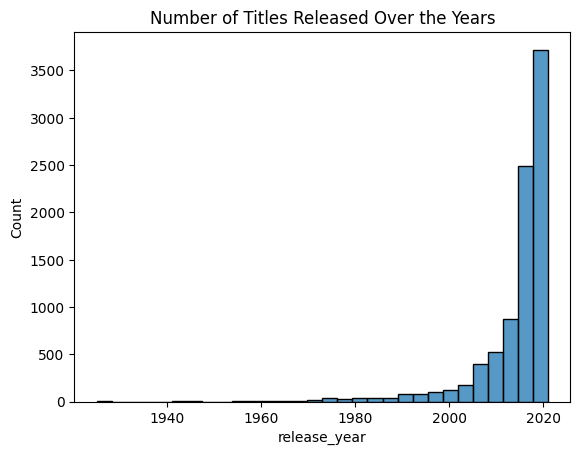

<Figure size 640x480 with 0 Axes>

In [22]:
# Distribution of Release Years
sns.histplot(df0['release_year'], bins=30, kde=False)
plt.title("Number of Titles Released Over the Years")
plt.show()
plt.savefig("../images/releases_over_time.png")

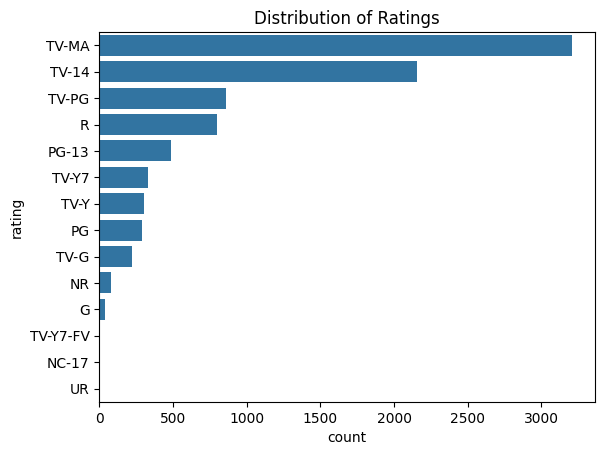

In [30]:
# Ratings distribution
sns.countplot(y="rating", data=df0, order=df0['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

#### Bivariate Analysis

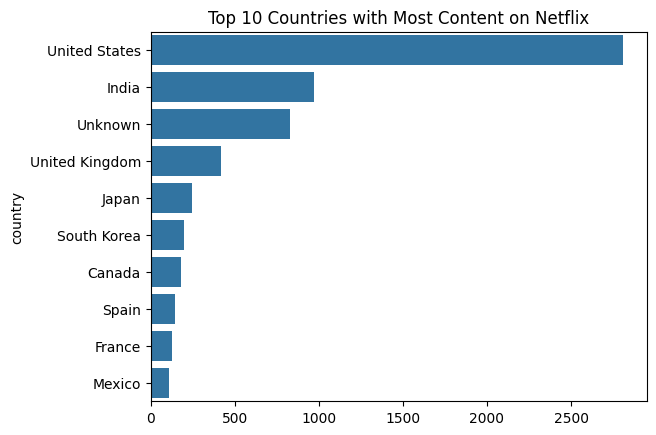

<Figure size 640x480 with 0 Axes>

In [31]:
# Top 10 countries producing content
top_countries = df0['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()
plt.savefig("../images/top_countries.png")

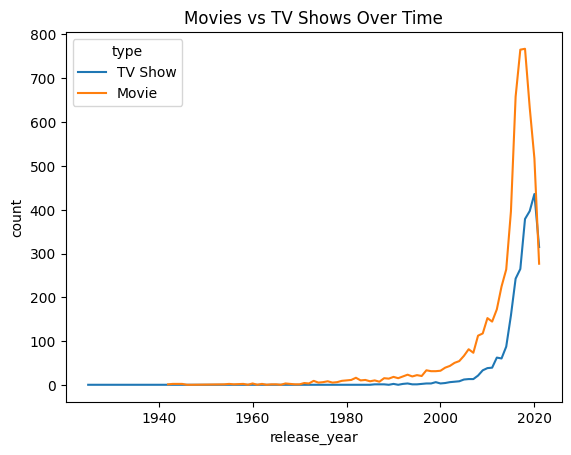

In [32]:
# Movies vs TV Shows over time
content_trend = df0.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(data=content_trend, x="release_year", y="count", hue="type")
plt.title("Movies vs TV Shows Over Time")
plt.show()

#### Genre Analysis

In [ ]:
! pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\cysd1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
from wordcloud import WordCloud as wc

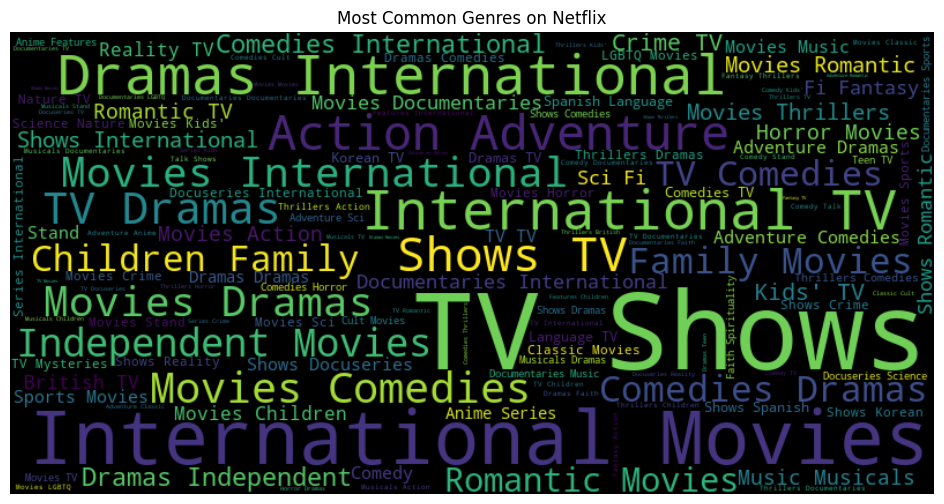

<Figure size 640x480 with 0 Axes>

In [52]:
all_genres = " ".join(df0['listed_in'].dropna().astype(str))
wordcloud = wc(width=800, height=400, background_color="black").generate(all_genres)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Genres on Netflix")
plt.show()
plt.savefig("../images/genres_wordcloud.png")

#### Duration Analysis

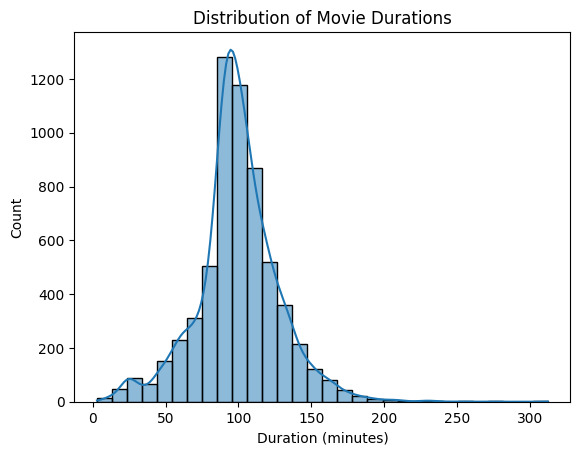

<Figure size 640x480 with 0 Axes>

In [54]:
# Movie durations
movie_df = df0[df0['type'] == "Movie"].copy()
movie_df['duration'] = movie_df['duration'].str.replace(" min", "").astype(float)

sns.histplot(movie_df['duration'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()
plt.savefig("../images/movie_durations.png")

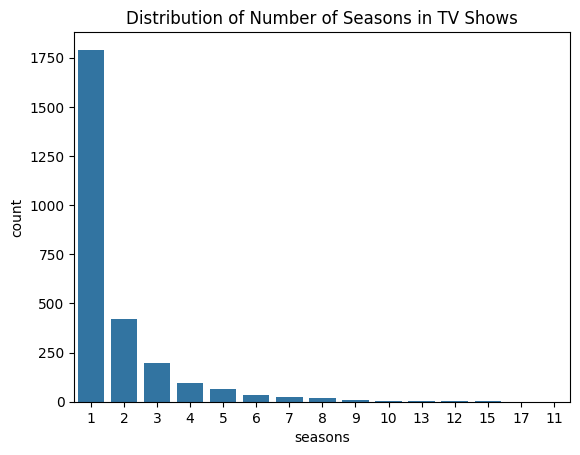

<Figure size 640x480 with 0 Axes>

In [55]:
# TV Show seasons
tv_df = df0[df0['type'] == "TV Show"].copy()
tv_df['seasons'] = tv_df['duration'].str.replace(" Season", "").str.replace("s", "").astype(int)

sns.countplot(x="seasons", data=tv_df, order=tv_df['seasons'].value_counts().index)
plt.title("Distribution of Number of Seasons in TV Shows")
plt.show()
plt.savefig("../images/tvshow_seasons.png")